In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("fivethirtyeight")
import seaborn as sns
import re

In [2]:
df = pd.read_csv("accounts.csv") # reading in data created from cleanup

In [3]:
def bots(text):
    if text == "bot":
        return 1
    else: 
        return 0

In [4]:
df["type"] = df["type"].apply(bots)

In [5]:
df.describe()

,mentions,replies_count,retweets_count,likes_count,retweet,video,hashtag_count,number_in_name,more_than_5_digit_end,type
count,178303.000000,178303.000000,178303.000000,178303.000000,178303.0,178303.000000,178303.000000,178303.000000,178303.0,178303.000000
mean,0.267006,2.031065,7.986887,61.684503,0.0,0.014313,0.478444,0.022254,0.0,0.376931
std,0.442397,31.417120,133.404029,801.105981,0.0,0.118777,1.069788,0.147510,0.0,0.484619
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.000000,1.000000,2.000000,8.000000,0.0,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,6417.000000,24804.000000,83546.000000,0.0,1.000000,23.000000,1.000000,0.0,1.000000


In [6]:
df.drop("retweet more_than_5_digit_end".split(), axis=1, inplace=True) # dropping this column due to a low volume of these accounts

In [7]:
df.head()

,timezone,username,name,tweet,mentions,replies_count,retweets_count,likes_count,video,hashtag_count,number_in_name,type
0,Eastern Daylight Time,11_11_bot,☆☆:☆☆,what is here today will be gone tomorrow ✨ but...,0,0,0,0,0,0,0,1
1,Eastern Daylight Time,11_11_bot,☆☆:☆☆,you don't know what will happen tomorrow or ev...,0,0,0,0,0,0,0,1
2,Eastern Daylight Time,11_11_bot,☆☆:☆☆,you could die at any moment ✨ tell the people ...,0,0,0,0,0,0,0,1
3,Eastern Daylight Time,11_11_bot,☆☆:☆☆,you're going to die anyway ✨ tell the people i...,0,0,0,0,0,0,0,1
4,Eastern Daylight Time,11_11_bot,☆☆:☆☆,the people you love could die at any moment ✨ ...,0,0,0,0,0,0,0,1


In [9]:
df.drop("timezone username name tweet".split(), axis=1, inplace=True)

C:\Users\jpzam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jpzam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jpzam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jpzam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jpzam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jpzam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

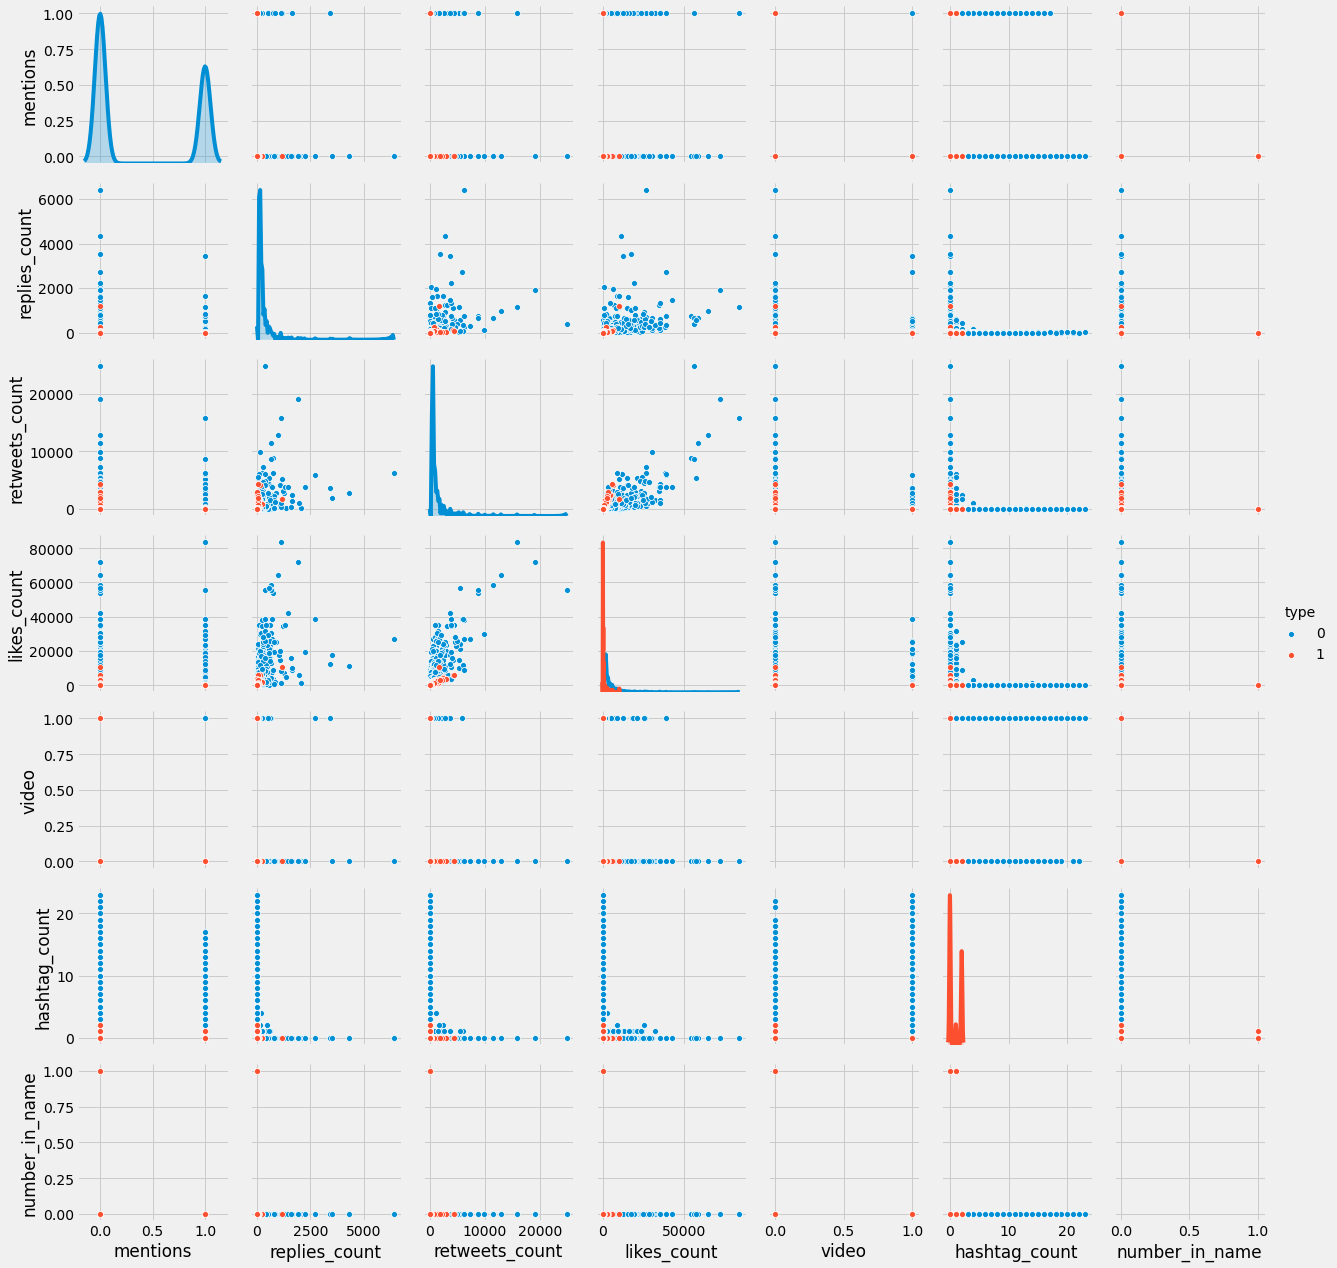

In [10]:
sns.pairplot(df, hue="type")

From the pairplot above, it looks like bots tend to receive less replies, retweets, and likes compared to real users.

C:\Users\jpzam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jpzam\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


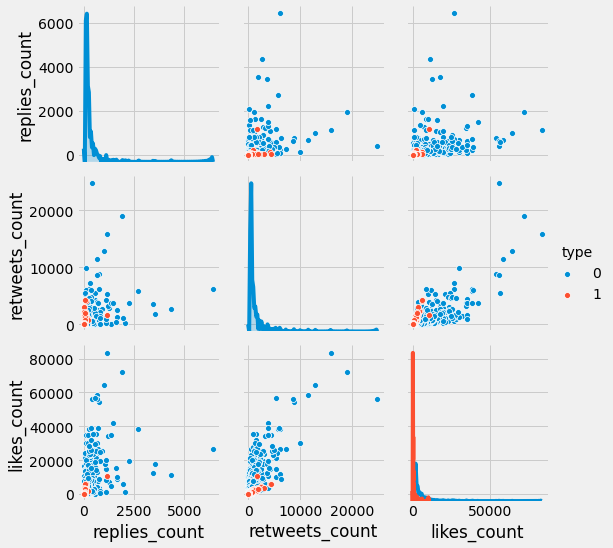

In [11]:
sns.pairplot(df[["replies_count", "retweets_count", "likes_count", "type"]], hue="type")

In [13]:
from sklearn.model_selection import train_test_split

We'll split the data into 4 different sets, `X_train`, `X_test`, `y_train`, and `y_test`.  These 4 sets will be used to train and assess our model.

In [14]:
X = df.drop("type", axis=1)
y = df["type"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Importing multiple models below to determine which might be the best fit for our data.

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

The code below creates model pipelines.  We'll test both scaled and unscaled versions.

In [27]:
pipe_sgd = Pipeline([("scaler", StandardScaler()), ("sgd", SGDClassifier())])
pipe_lr = Pipeline([("scaler", StandardScaler()), ("lr", LogisticRegression())])
pipe_rf = Pipeline([("scaler", StandardScaler()), ("rf", RandomForestClassifier())])
pipe_rf_no_scale = Pipeline([("rf", RandomForestClassifier())])

In [29]:
pipe_sgd.fit(X_train, y_train)
pipe_lr.fit(X_train, y_train)
pipe_rf.fit(X_train, y_train)
pipe_rf_no_scale.fit(X_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier())])

In [30]:
print(pipe_sgd.score(X_test, y_test))
print(pipe_lr.score(X_test, y_test))
print(pipe_rf.score(X_test, y_test))
print(pipe_rf_no_scale.score(X_test, y_test))

0.7501359619306595
0.7522943575798776
0.9109959211420802
0.9109789259007478


The weighted average scores above indicate that a random forest model with scaling applied will be our best fit.

In [23]:
preds = pipe_rf.predict(X_test)

In [24]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93     36498
           1       0.91      0.85      0.88     22342

    accuracy                           0.91     58840
   macro avg       0.91      0.90      0.90     58840
weighted avg       0.91      0.91      0.91     58840



The model performed very well for this data.  Overall, we have around a 91% prediction accuracy.